# Nearest Neighbors

Recommendation systems fundamentally use some kind of nearest-neighbor algorithm.  The nearest neighboring data points represent items you'd most likely be interested in.

In [22]:
import numpy
from matplotlib import pyplot
from sklearn.neighbors import NearestNeighbors
import ipywidgets as widgets

## Input Data

In [3]:
X = numpy.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9], [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9], [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])

## Visualizing Input Data

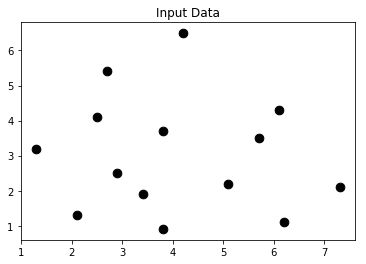

In [5]:
pyplot.figure()
pyplot.title("Input Data")
pyplot.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='black')
pyplot.show()

## Building the Model

In [52]:
knn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
knn.fit(X)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

## Determining the Neighbors

In [53]:
def neighbors(testx=4.3, testy=2.7):
    test = [testx, testy]
    distances, indices = knn.kneighbors([test])
    neighbors = X[indices][0][:]
        
    pyplot.figure()
    pyplot.title("Nearest Neighbors")
    pyplot.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='k')
    pyplot.scatter(neighbors[:, 0], neighbors[:, 1], marker='o', s=250, color='red', facecolors='none')
    pyplot.scatter(test[0], test[1], marker='x', s=75, color='k')
    pyplot.show()

    print("K Nearest Neighbors:")
    for rank, index in enumerate(indices[0], start=1):
        print("\t{0} ==> {1}".format(rank, X[index]))

    
testx = widgets.FloatSlider(value=4.3, min=0, max=8, step=0.5, description="X", continuous_update=False)
testy = widgets.FloatSlider(value=2.7, min=0, max=8, step=0.5, description="Y", continuous_update=False)

widgets.interactive(
    neighbors,
    testx=testx,
    testy=testy
)

interactive(children=(FloatSlider(value=4.3, continuous_update=False, description='X', max=8.0, step=0.5), Flo…